In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

In [2]:
complete = pd.read_csv('complete_p_logor_se_aic_desc.tsv', sep='\t')
complete['locus'] = complete['allelotype'].str.split('_').apply(lambda x: x[0])

In [3]:
allelotype_counts = complete[complete['add_p'] <= 0.05].groupby('allelotype').count()
allelotype_counts.reset_index(level=0, inplace=True)
allelotype_counts['locus'] = allelotype_counts['allelotype'].str.split('_').apply(lambda x: x[0])
allelotype_counts = allelotype_counts[['allelotype', 'description', 'locus']]
allelotype_counts.columns = ['allelotype', 'num_assoc', 'locus']
allelotype_counts = allelotype_counts.set_index('allelotype')
allelotype_counts = allelotype_counts.sort_values(by='num_assoc', ascending=False)
phenotype_counts = complete[complete['add_p'] <= 0.05].groupby('phenotype').count()['Unnamed: 0']
locus_counts = complete[complete['add_p'] <= 0.05].groupby('locus').count()['Unnamed: 0']

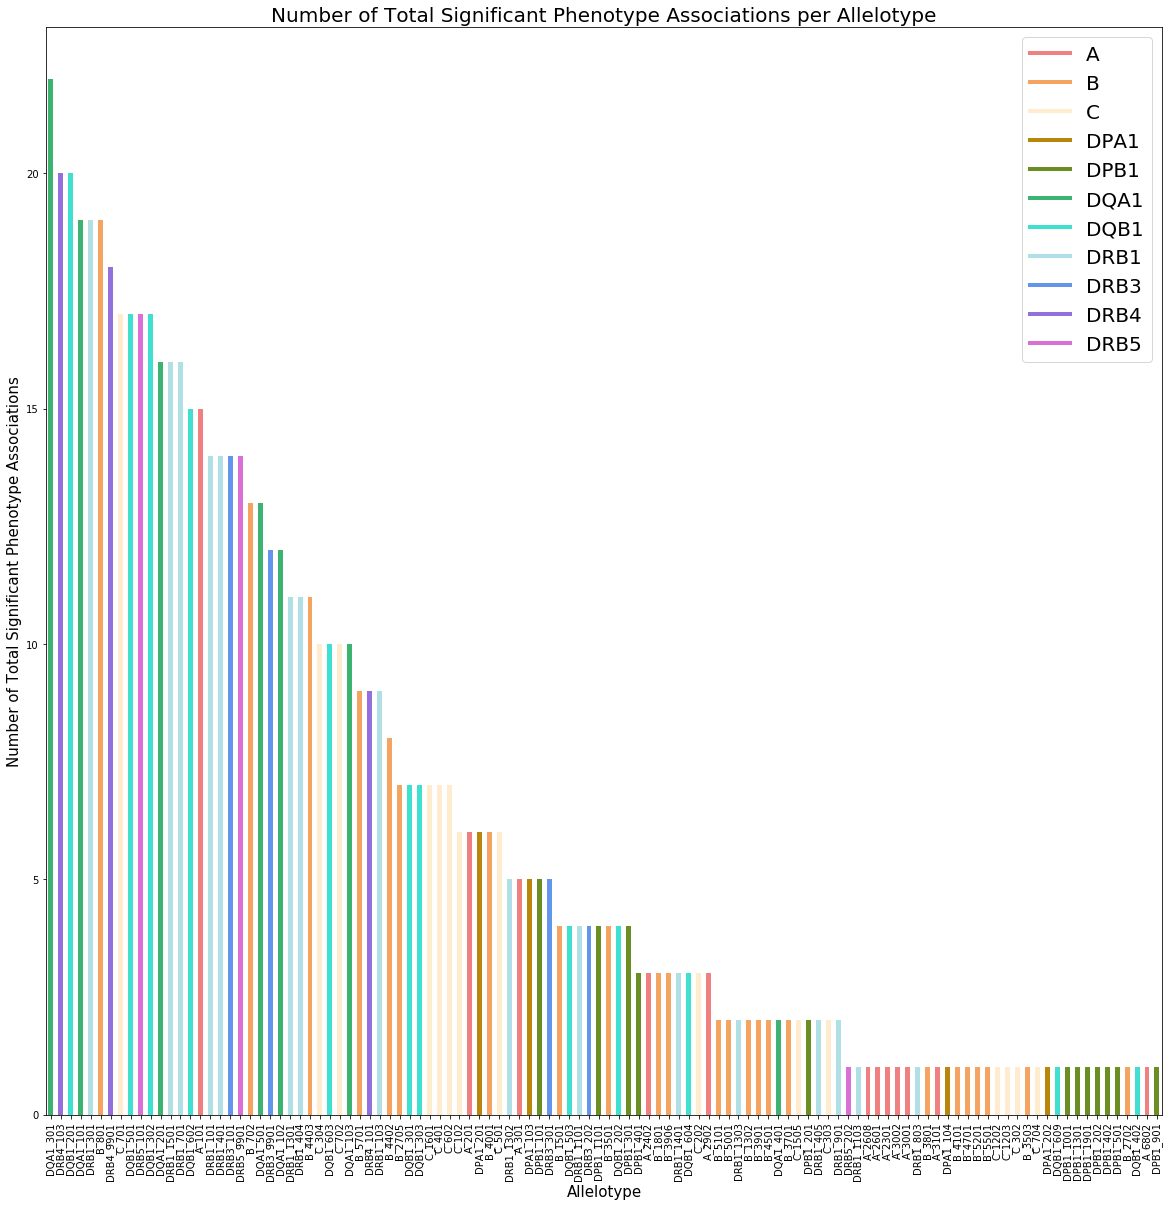

In [4]:
plt.figure(figsize=(20,20))
colors = {'A': 'lightcoral', 
          'B': 'sandybrown', 
          'C': 'blanchedalmond', 
          'DPA1': 'darkgoldenrod', 
          'DPB1': 'olivedrab', 
          'DQA1': 'mediumseagreen', 
          'DQB1': 'turquoise', 
          'DRB1': 'powderblue', 
          'DRB3': 'cornflowerblue', 
          'DRB4': 'mediumpurple', 
          'DRB5': 'orchid'}
ax = allelotype_counts['num_assoc'].plot(kind='bar', color=[colors[i] for i in allelotype_counts['locus']])

plt.title('Number of Total Significant Phenotype Associations per Allelotype', size=20)
plt.xlabel('Allelotype', size=15)
plt.ylabel('Number of Total Significant Phenotype Associations', size=15)
patches, labels = ax.get_legend_handles_labels()

custom_lines = [Line2D([0], [0], color='lightcoral', lw=4),
                Line2D([0], [0], color='sandybrown', lw=4),
                Line2D([0], [0], color='blanchedalmond', lw=4),
                Line2D([0], [0], color='darkgoldenrod', lw=4),
                Line2D([0], [0], color='olivedrab', lw=4),
                Line2D([0], [0], color='mediumseagreen', lw=4),
                Line2D([0], [0], color='turquoise', lw=4),
                Line2D([0], [0], color='powderblue', lw=4),
                Line2D([0], [0], color='cornflowerblue', lw=4),
                Line2D([0], [0], color='mediumpurple', lw=4),
                Line2D([0], [0], color='orchid', lw=4)]
ax.legend(custom_lines, ['A','B','C','DPA1','DPB1','DQA1','DQB1','DRB1','DRB3','DRB4','DRB5'], prop={'size': 20}) 
plt.show()

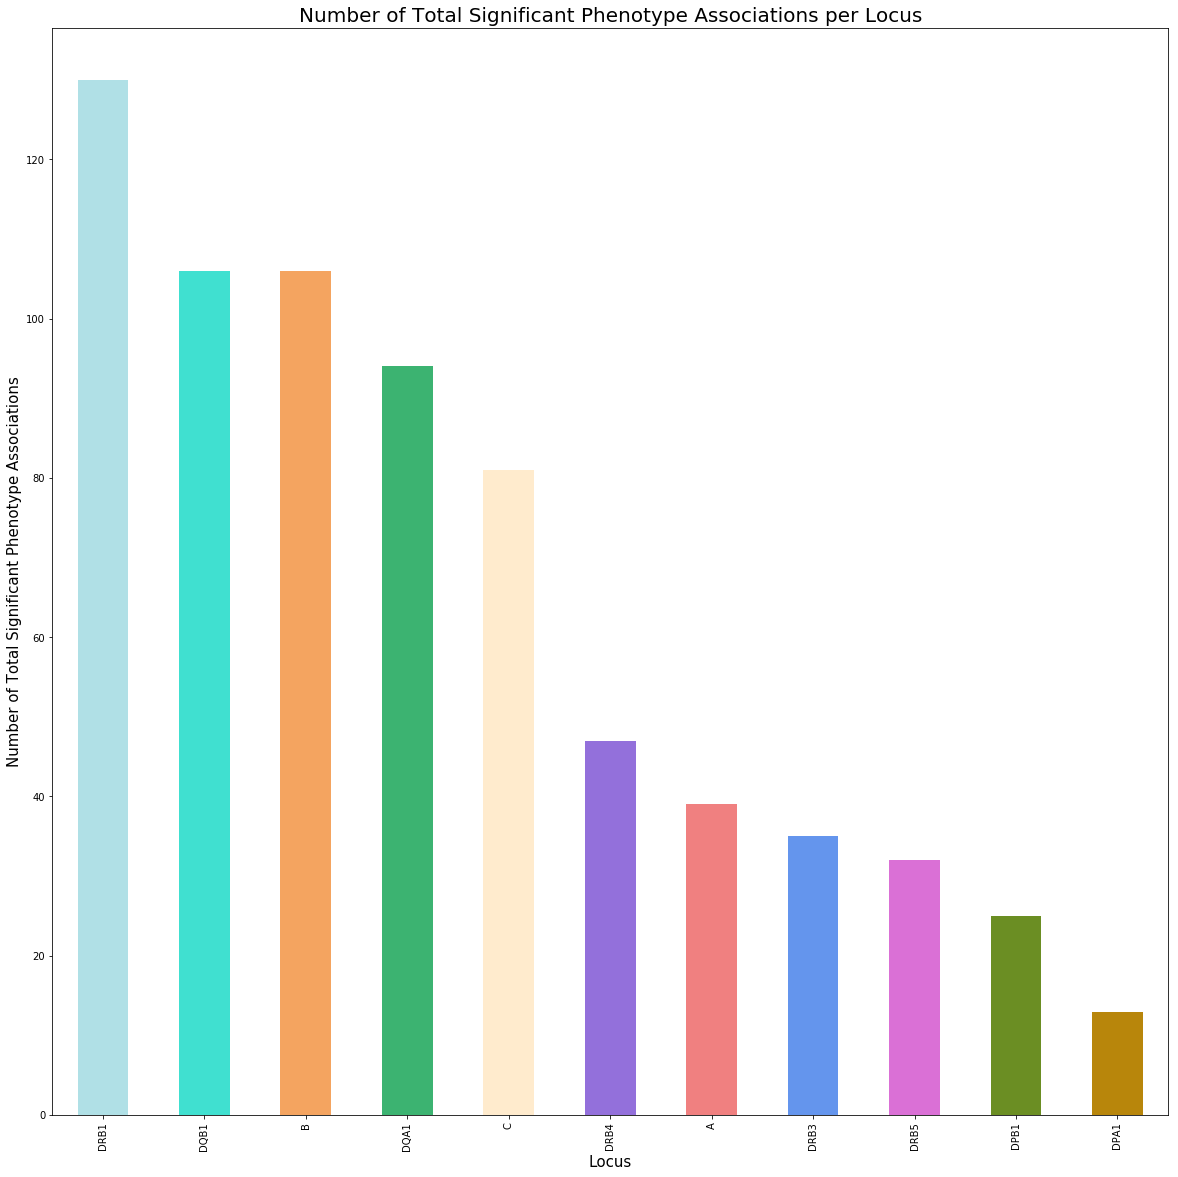

In [5]:
plt.figure(figsize=(20,20))
locus_counts.sort_values(ascending=False).plot(kind='bar', color=['powderblue',
                                                                  'turquoise', 
                                                                  'sandybrown',
                                                                  'mediumseagreen', 
                                                                  'blanchedalmond',
                                                                  'mediumpurple',
                                                                  'lightcoral', 
                                                                  'cornflowerblue',
                                                                  'orchid',
                                                                  'olivedrab', 
                                                                  'darkgoldenrod'])
plt.title('Number of Total Significant Phenotype Associations per Locus', size=20)
plt.xlabel('Locus', size=15)
plt.ylabel('Number of Total Significant Phenotype Associations', size=15)
plt.show()

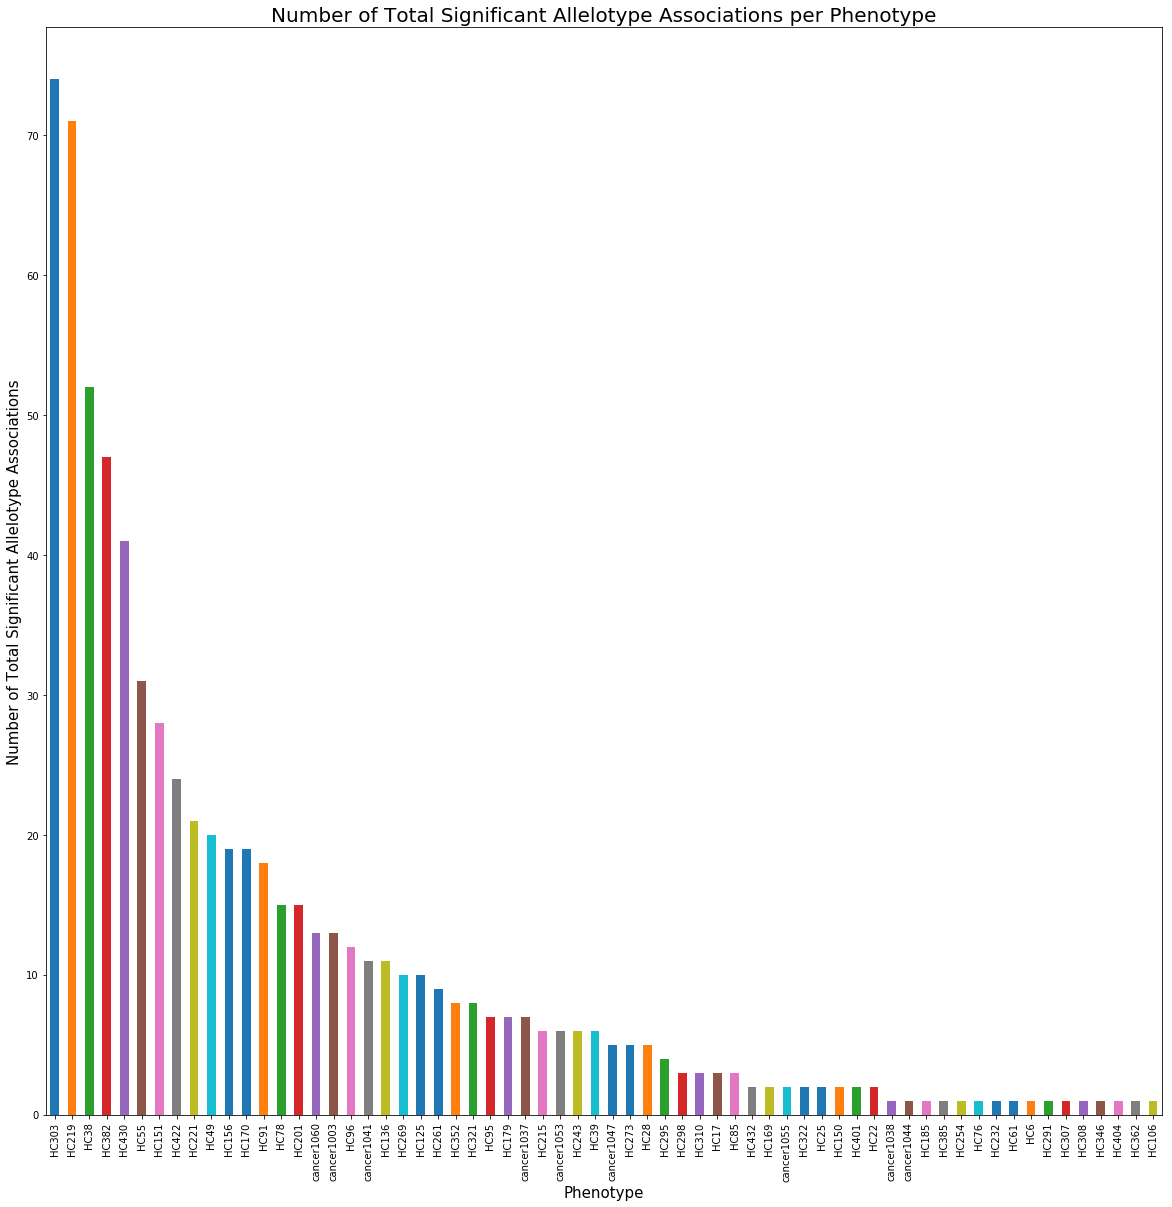

In [6]:
plt.figure(figsize=(20,20))
phenotype_counts.sort_values(ascending=False).plot(kind='bar')
plt.title('Number of Total Significant Allelotype Associations per Phenotype', size=20)
plt.xlabel('Phenotype', size=15)
plt.ylabel('Number of Total Significant Allelotype Associations', size=15)
plt.show()